# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# analyise data

In [2]:
data = pd.read_csv('C:\\Users\\LavaN-32428068\\Desktop\\python test\\car-price-prediction\\car_prediction_data.csv')
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df = df.drop('Car_Name' , axis=1)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

C:\Users\LavaN-32428068\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


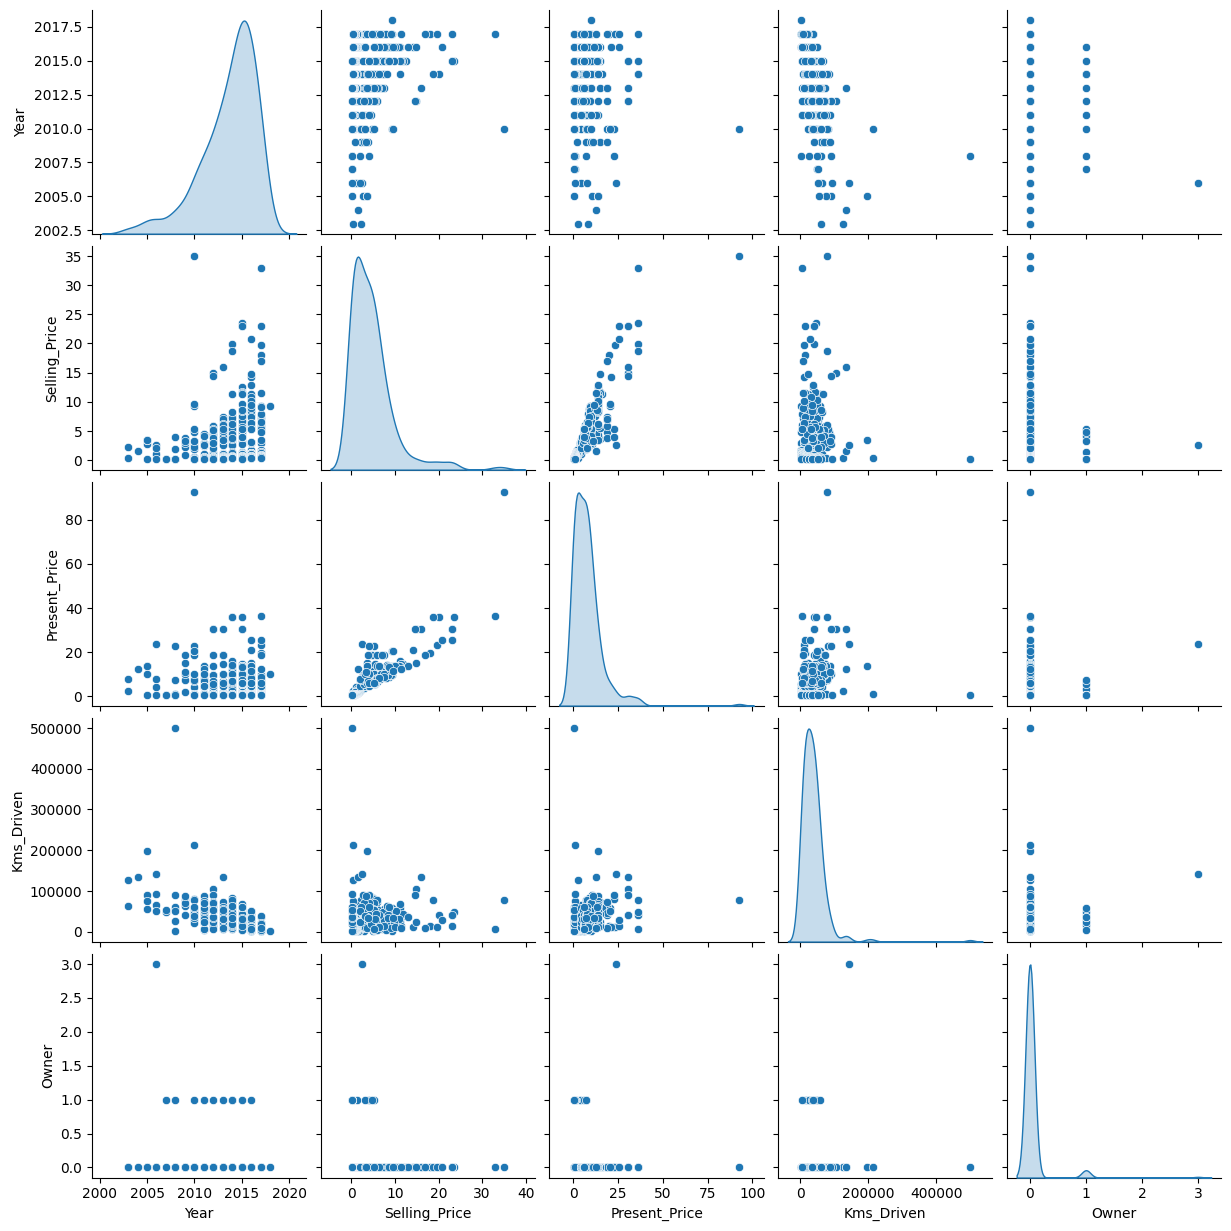

In [7]:
sns.pairplot(data=df, diag_kind='kde')

In [8]:
df1 = df.copy()
df1['Year'] = 2019 - df1['Year']
df1 = df1.sort_values(by = 'Year')
df1 = df1.reset_index(drop = True)
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1,9.25,9.83,2071,Diesel,Dealer,Manual,0
1,2,33.00,36.23,6000,Diesel,Dealer,Automatic,0
2,2,0.80,0.87,3000,Petrol,Individual,Manual,0
3,2,3.50,4.43,38488,Petrol,Dealer,Manual,0
4,2,0.90,0.95,1300,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...
296,14,3.51,13.70,75000,Petrol,Dealer,Manual,0
297,14,3.49,13.46,197176,Diesel,Dealer,Manual,0
298,15,1.50,12.35,135154,Petrol,Dealer,Automatic,0
299,16,0.35,2.28,127000,Petrol,Individual,Manual,0


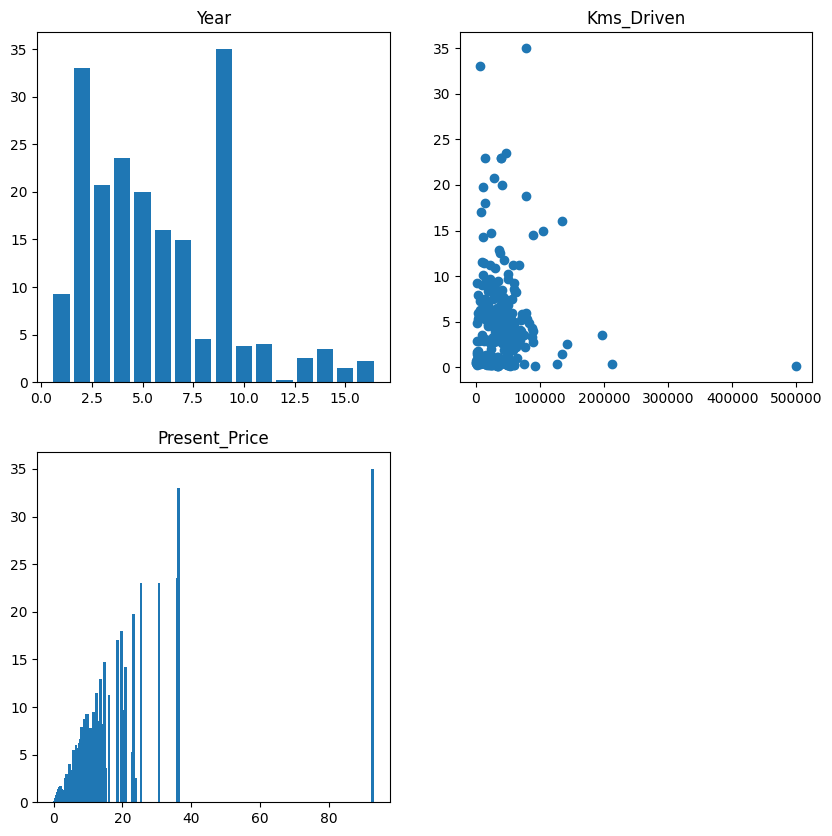

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.bar(df1['Year'] , df1['Selling_Price'] ) 
plt.title("Year")

df1 = df1.sort_values(by = 'Kms_Driven')
plt.subplot(222)
plt.scatter(df1['Kms_Driven'] , df1['Selling_Price'] ) 
plt.title("Kms_Driven")

df1 = df1.sort_values(by = 'Present_Price')
plt.subplot(223)
plt.bar(df1['Present_Price'] , df1['Selling_Price'] ) 
plt.title("Present_Price")

df1 = df1.sort_values(by = 'Year')
df1 = df1.reset_index(drop = True)
plt.show()

Text(0.5, 1.0, 'Owner')

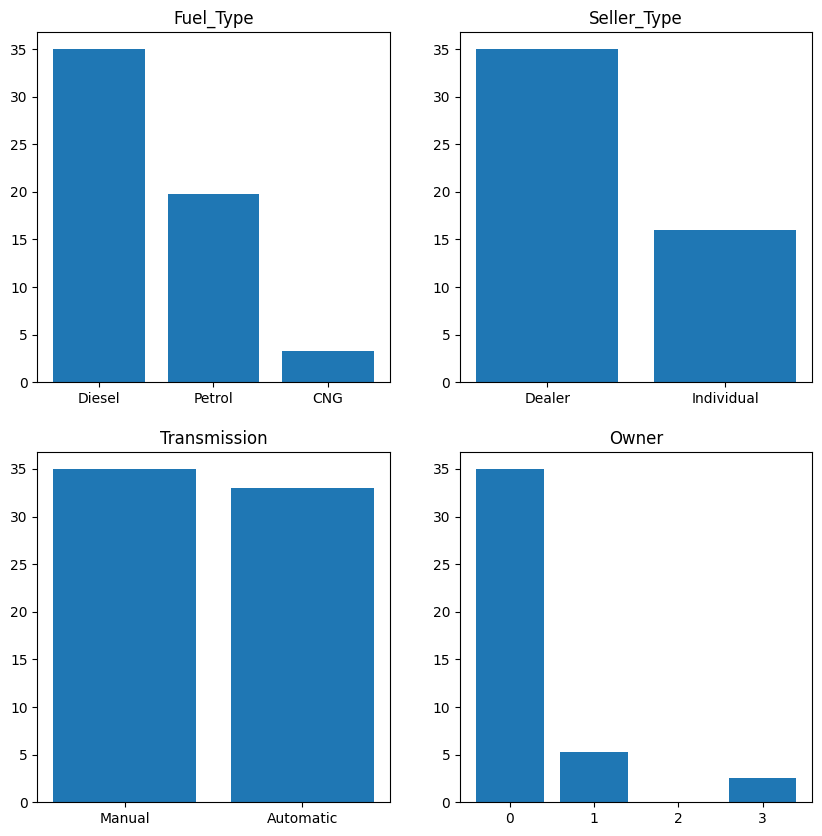

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.bar(df1['Fuel_Type'] , df1['Selling_Price'] ) 
plt.title("Fuel_Type")

plt.subplot(222)
plt.bar(df1['Seller_Type'] , df1['Selling_Price'] ) 
plt.title("Seller_Type")

plt.subplot(223)
plt.bar(df1['Transmission'] , df1['Selling_Price'] ) 
plt.title("Transmission")

plt.subplot(224)
plt.bar(df1['Owner'] , df1['Selling_Price'] ) 
plt.title("Owner")

In [11]:
df2 = df1.copy()

fule = {'Diesel' : 2 , 'Petrol':3 , 'CNG':4}
df2['Fuel_Type'] = df2['Fuel_Type'].map(fule)

Seller = {'Dealer' : 2 , 'Individual':3}
df2['Seller_Type'] = df2['Seller_Type'].map(Seller)

Transmission = {'Manual' : 2 , 'Automatic':3}
df2['Transmission'] = df2['Transmission'].map(Transmission)

df2

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1,9.25,9.83,2071,2,2,2,0
1,2,17.00,18.64,8700,3,2,2,0
2,2,1.65,1.78,4000,3,3,2,0
3,2,6.00,6.49,16200,3,3,2,0
4,2,33.00,36.23,6000,2,2,3,0
...,...,...,...,...,...,...,...,...
296,14,0.20,0.57,55000,3,3,2,0
297,14,3.51,13.70,75000,3,2,2,0
298,15,1.50,12.35,135154,3,2,3,0
299,16,2.25,7.98,62000,3,2,2,0


In [12]:
df1['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

('Diesel' : 2 , 'Petrol':3 , 'CNG':4)
('Manual' : 2 , 'Automatic':3)
('Dealer' : 2 , 'Individual':3)

# ML

In [13]:
x = df2.drop('Selling_Price' , axis=1).value
y = df2['Selling_Price'].values.reshape(-1,1)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=0)

In [15]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [16]:
y_pred = model.predict(x_test)

# Test

In [17]:
print('mean_absolute_error : ' , metrics.mean_absolute_error(y_test , y_pred))
print('mean_squared_error : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' ,np.sqrt(metrics.mean_squared_error(y_test , y_pred)) )
print('r2_score : ', metrics.r2_score(y_test , y_pred))

mean_absolute_error :  1.0341593048813662
mean_squared_error :  1.903284859628013
RMSE :  1.379595904469136
r2_score :  0.8950165257058598


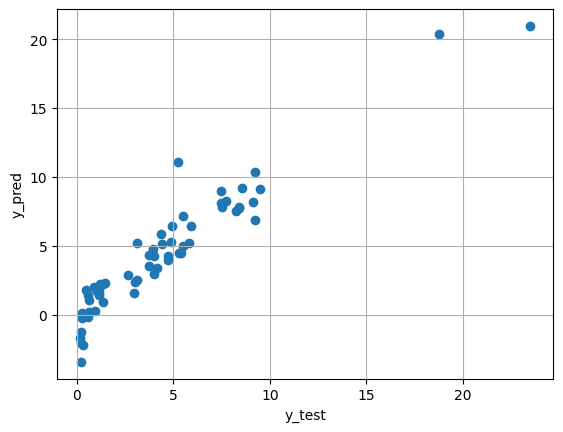

In [18]:
plt.scatter(y_test , y_pred)
plt.grid()
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

ofoghi = 0-25        amoodi = -2-21

In [19]:
x_test.insert(7 , 'y_pred' , y_pred)
x_test.insert(7 , 'y_test' , y_test)
x_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,y_test,y_pred
223,7,6.79,35000,3,2,2,0,3.75,3.523923
150,5,35.96,78000,2,2,3,0,18.75,20.342737
226,7,0.81,19000,3,3,2,0,0.60,-0.179687
296,14,0.57,55000,3,3,2,0,0.20,-3.406034
52,3,1.26,5700,3,3,2,0,1.05,1.754137
...,...,...,...,...,...,...,...,...,...
137,4,9.94,15000,3,2,3,0,7.50,7.852695
227,7,6.79,52132,2,2,2,0,3.10,5.222202
26,2,9.29,37000,3,2,3,0,7.75,8.242875
106,4,7.71,25870,3,2,2,0,5.80,5.226302


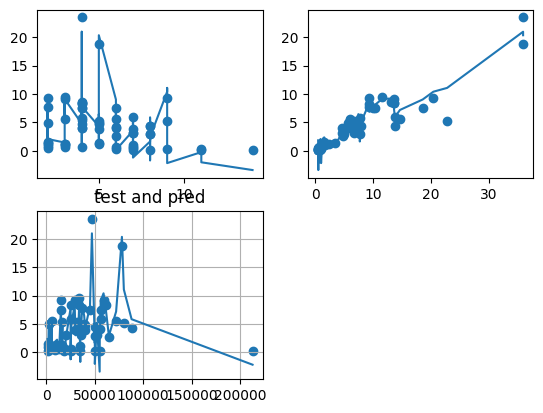

In [20]:
plt.subplot(221)
x_test = x_test.sort_values(by = 'Year')
plt.scatter(x_test['Year'] , x_test['y_test'])
plt.plot(x_test['Year'] , x_test['y_pred'])

plt.subplot(222)
x_test = x_test.sort_values(by = 'Present_Price')
plt.scatter(x_test['Present_Price'] , x_test['y_test'])
plt.plot(x_test['Present_Price'] , x_test['y_pred'])

plt.subplot(223)
x_test = x_test.sort_values(by = 'Kms_Driven')
plt.scatter(x_test['Kms_Driven'] , x_test['y_test'])
plt.plot(x_test['Kms_Driven'] , x_test['y_pred'])

plt.grid()
plt.title ('test and pred')
plt.show()

In [21]:
compare = pd.DataFrame({'actual' : y_test.flatten() 
                       ,'predicted' : y_pred.flatten()})
compare

,actual,predicted
0,3.75,3.523923
1,18.75,20.342737
2,0.60,-0.179687
3,0.20,-3.406034
4,1.05,1.754137
...,...,...
56,7.50,7.852695
57,3.10,5.222202
58,7.75,8.242875
59,5.80,5.226302


# improve my learning

cross validation

In [22]:
df2.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,-0.236141,0.047584,0.524342,0.066046,0.039896,0.000394,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.541973,-0.550724,0.367128,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,-0.462434,-0.512030,0.348715,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,-0.165307,-0.101419,0.162510,0.089216
Fuel_Type,0.066046,-0.541973,-0.462434,-0.165307,1.000000,0.328810,-0.102234,0.049163
Seller_Type,0.039896,-0.550724,-0.512030,-0.101419,0.328810,1.000000,-0.063240,0.124269
Transmission,0.000394,0.367128,0.348715,0.162510,-0.102234,-0.063240,1.000000,0.050316
Owner,0.182104,-0.088344,0.008057,0.089216,0.049163,0.124269,0.050316,1.000000


In [23]:
kfold = KFold(5)
result = cross_val_score(model,x,y,cv=kfold)

print(result)
print(np.mean(result))

[ 0.81591368  0.85959524  0.94025741  0.86852277 -0.07666944]
0.6815239333150009


In [24]:
df3 = df2.drop(df2.index[range(241,301)])
df3

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1,9.25,9.83,2071,2,2,2,0
1,2,17.00,18.64,8700,3,2,2,0
2,2,1.65,1.78,4000,3,3,2,0
3,2,6.00,6.49,16200,3,3,2,0
4,2,33.00,36.23,6000,2,2,3,0
...,...,...,...,...,...,...,...,...
236,7,5.35,9.40,32322,2,2,2,0
237,7,4.50,9.40,36100,3,2,2,0
238,7,0.95,1.75,11500,3,3,2,0
239,7,4.50,9.40,36000,3,2,2,0


In [25]:
df2

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1,9.25,9.83,2071,2,2,2,0
1,2,17.00,18.64,8700,3,2,2,0
2,2,1.65,1.78,4000,3,3,2,0
3,2,6.00,6.49,16200,3,3,2,0
4,2,33.00,36.23,6000,2,2,3,0
...,...,...,...,...,...,...,...,...
296,14,0.20,0.57,55000,3,3,2,0
297,14,3.51,13.70,75000,3,2,2,0
298,15,1.50,12.35,135154,3,2,3,0
299,16,2.25,7.98,62000,3,2,2,0


In [26]:
x1 = df3.drop('Selling_Price' , axis=1)
y1 = df3['Selling_Price'].values.reshape(-1,1)

x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x1,y1,test_size=0.3 , random_state=0)

model1 = LinearRegression()
model1.fit(x_train1 , y_train1)

y_pred1 = model1.predict(x_test1)

print('mean_absolute_error : ' , metrics.mean_absolute_error(y_test1 , y_pred1))
print('mean_squared_error : ' , metrics.mean_squared_error(y_test1 , y_pred1))
print('RMSE : ' ,np.sqrt(metrics.mean_squared_error(y_test1 , y_pred1)) )
print('r2_score : ', metrics.r2_score(y_test1 , y_pred1))

mean_absolute_error :  0.846215676717724
mean_squared_error :  1.7093874301307208
RMSE :  1.3074354401387172
r2_score :  0.9260354087194894


In [27]:
kfold = KFold(5)
result1 = cross_val_score(model1,x1,y1,cv=kfold)

print(result1)
print(np.mean(result1))

[0.90591361 0.95334884 0.96966733 0.89448192 0.73049666]
0.8907816697240601


In [28]:
compare = pd.DataFrame({'actual' : y_test1.flatten() 
                       ,'predicted' : y_pred1.flatten()})
compare

,actual,predicted
0,0.18,-0.247080
1,12.90,10.397666
2,2.85,3.516421
3,10.11,9.829113
4,5.40,4.227953
...,...,...
68,8.55,8.909185
69,10.25,8.547913
70,33.00,26.058234
71,4.40,4.092744


loop for combin columns with them selves

In [29]:
r2_score = metrics.r2_score(y_test1 , y_pred1)
df4 = df3.drop('Selling_Price' , axis=1)
print ('last r2_score =',r2_score)
for column in df4 :
    new_column_name = (column+str(2))
    new_column_value = df4[column]**2
    df4.insert(0 , new_column_name , new_column_value)
    
    x2 = df4
    y2 = df3['Selling_Price'].values.reshape(-1,1)

    x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x2,y2,test_size=0.3 , random_state=0)

    model2 = LinearRegression()
    model2.fit(x_train2 , y_train2)

    y_pred2 = model2.predict(x_test2)
    new_r2 = metrics.r2_score(y_test2 , y_pred2)
    
    if new_r2 > r2_score:
        r2_score = new_r2
    else :
        df4 = df4.drop(new_column_name , axis=1)
print('new r2_score =' , r2_score)

last r2_score = 0.9260354087194894
new r2_score = 0.9277369862883987


In [30]:
compare = pd.DataFrame({'actual' : y_test2.flatten() 
                       ,'predicted' : y_pred2.flatten()})
compare

,actual,predicted
0,0.18,0.013236
1,12.90,10.616606
2,2.85,3.466557
3,10.11,9.631500
4,5.40,4.209288
...,...,...
68,8.55,8.995967
69,10.25,8.766930
70,33.00,26.237169
71,4.40,4.032850


ba frayand bala taghriba r2 scoreeman 4 sadom afzayesh yaft

In [31]:
df4

,Fuel_Type2,Kms_Driven2,Year2,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,4,4289041,1,1,9.83,2071,2,2,2,0
1,9,75690000,4,2,18.64,8700,3,2,2,0
2,9,16000000,4,2,1.78,4000,3,3,2,0
3,9,262440000,4,2,6.49,16200,3,3,2,0
4,4,36000000,4,2,36.23,6000,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...
236,4,1044711684,49,7,9.40,32322,2,2,2,0
237,9,1303210000,49,7,9.40,36100,3,2,2,0
238,9,132250000,49,7,1.75,11500,3,3,2,0
239,9,1296000000,49,7,9.40,36000,3,2,2,0


In [32]:
df4.insert(0 , 'Selling_Price', df3['Selling_Price'])
df4.corr()

,Selling_Price,Fuel_Type2,Kms_Driven2,Year2,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Selling_Price,1.000000,-0.528419,0.255538,-0.160972,-0.159965,0.940793,0.244966,-0.533849,-0.588168,0.479024,-0.078211
Fuel_Type2,-0.528419,1.000000,-0.416600,-0.088254,-0.095118,-0.515223,-0.442527,0.998269,0.344456,-0.150999,0.081178
Kms_Driven2,0.255538,-0.416600,1.000000,0.417598,0.428030,0.441876,0.910038,-0.421972,-0.226685,0.155062,-0.048516
Year2,-0.160972,-0.088254,0.417598,1.000000,0.984455,0.025907,0.504558,-0.088244,-0.043593,-0.092012,0.077299
Year,-0.159965,-0.095118,0.428030,0.984455,1.000000,0.030130,0.538479,-0.095825,-0.062954,-0.100572,0.082661
Present_Price,0.940793,-0.515223,0.441876,0.025907,0.030130,1.000000,0.426153,-0.520664,-0.592844,0.474107,-0.074586
Kms_Driven,0.244966,-0.442527,0.910038,0.504558,0.538479,0.426153,1.000000,-0.449458,-0.365466,0.074167,-0.041009
Fuel_Type,-0.533849,0.998269,-0.421972,-0.088244,-0.095825,-0.520664,-0.449458,1.000000,0.351749,-0.151460,0.082860
Seller_Type,-0.588168,0.344456,-0.226685,-0.043593,-0.062954,-0.592844,-0.365466,0.351749,1.000000,-0.092805,0.053876
Transmission,0.479024,-0.150999,0.155062,-0.092012,-0.100572,0.474107,0.074167,-0.151460,-0.092805,1.000000,-0.061392


In [33]:
comp = np.corrcoef(df4.Present_Price , df4.Selling_Price)
comp

array([[1.        , 0.94079347],
       [0.94079347, 1.        ]])

In [34]:
Year_Fuel = df4['Year']*df4['Fuel_Type']
Year_Fuel2 = df4['Year']*df4['Fuel_Type2']
Year_Kms = df4['Year']*df4['Kms_Driven']
Year_Kms2 = df4['Year']*df4['Kms_Driven2']
Year_Present = df4['Year']*df4['Present_Price']
Year2_Fuel = df4['Year2']*df4['Fuel_Type']
Year2_Fuel2 = df4['Year2']*df4['Fuel_Type2']
Year2_Kms = df4['Year2']*df4['Kms_Driven']
Year2_Kms2 = df4['Year2']*df4['Kms_Driven2']
Year2_Present = df4['Year2']*df4['Present_Price']

In [35]:
df5 = df4.copy()
df5.insert(0 ,'Year_Fuel',Year_Fuel )
df5.insert(0 ,'Year_Fuel2',Year_Fuel2 )
df5.insert(0 ,'Year_Kms',Year_Kms )
df5.insert(0 ,'Year_Kms2',Year_Kms2 )
df5.insert(0 ,'Year_Present',Year_Present )
df5.insert(0 ,'Year2_Fuel',Year2_Fuel )
df5.insert(0 ,'Year2_Fuel2',Year2_Fuel2 )
df5.insert(0 ,'Year2_Kms',Year2_Kms )
df5.insert(0 ,'Year2_Kms2',Year2_Kms2 )
df5.insert(0 ,'Year2_Present',Year2_Present )

In [36]:
x3 = df5.drop('Selling_Price' , axis=1)
y3 = df5['Selling_Price'].values.reshape(-1,1)

x_train3 , x_test3 , y_train3 , y_test3 = train_test_split(x3,y3,test_size=0.3 , random_state=0)

model3 = LinearRegression()
model3.fit(x_train3 , y_train3)

y_pred3 = model3.predict(x_test3)
new_r2 = metrics.r2_score(y_test3 , y_pred3)
print('last r2_score =' ,r2_score)
print('new r2_score =' ,new_r2)

last r2_score = 0.9277369862883987
new r2_score = 0.979759974859315


In [37]:
print('mean_absolute_error : ' , metrics.mean_absolute_error(y_test3 , y_pred3))
print('mean_squared_error : ' , metrics.mean_squared_error(y_test3 , y_pred3))
print('RMSE : ' ,np.sqrt(metrics.mean_squared_error(y_test3 , y_pred3)) )
print('r2_score : ', metrics.r2_score(y_test3 , y_pred3))

mean_absolute_error :  0.5231894150098498
mean_squared_error :  0.46776496647975496
RMSE :  0.6839334517917331
r2_score :  0.979759974859315


In [38]:
compare = pd.DataFrame({'actual' : y_test3.flatten() 
                       ,'predicted' : y_pred3.flatten()})
compare

,actual,predicted
0,0.18,0.129859
1,12.90,11.337892
2,2.85,3.307863
3,10.11,10.433936
4,5.40,4.299925
...,...,...
68,8.55,9.268869
69,10.25,9.810596
70,33.00,31.990256
71,4.40,4.094105


In [39]:
kfold = KFold(10)
result1 = cross_val_score(model1,x3,y3,cv=kfold)

print(result1)
print(np.mean(result1))

[0.98982713 0.9791226  0.96761914 0.97989127 0.89959683 0.98280776
 0.95472402 0.93504368 0.9520122  0.91184473]
0.9552489342204037


# finally r2_score = 0.979759974859315

In [40]:
x_test3.shape

(73, 20)

In [41]:
x_test3.insert(20 , 'y_pred' , y_pred3)
x_test3.insert(20 , 'y_test' , y_test3)
x_test3

,Year2_Present,Year2_Kms2,Year2_Kms,Year2_Fuel2,Year2_Fuel,Year_Present,Year_Kms2,Year_Kms,Year_Fuel2,Year_Fuel,...,Year2,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,y_test,y_pred
109,5.12,19600000000,560000,144,48,1.28,4900000000,140000,36,12,...,16,4,0.32,35000,3,3,2,0,0.18,0.129859
71,122.40,11621271204,323406,36,18,40.80,3873757068,107802,12,6,...,9,3,13.60,35934,2,2,2,0,12.90,11.337892
37,35.55,5625000000,225000,81,27,11.85,1875000000,75000,27,9,...,9,3,3.95,25000,3,2,2,0,2.85,3.307863
74,122.40,1085043600,98820,81,27,40.80,361681200,32940,27,9,...,9,3,13.60,10980,3,2,2,0,10.11,10.433936
108,97.60,15802501264,502832,144,48,24.40,3950625316,125708,36,12,...,16,4,6.10,31427,3,2,2,0,5.40,4.299925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,209.44,57746012416,961216,64,32,52.36,14436503104,240304,16,8,...,16,4,13.09,60076,2,2,2,0,8.55,9.268869
73,122.40,22107526596,446058,81,27,40.80,7369175532,148686,27,9,...,9,3,13.60,49562,3,2,2,0,10.25,9.810596
4,144.92,144000000,24000,16,8,72.46,72000000,12000,8,4,...,4,2,36.23,6000,2,2,3,0,33.00,31.990256
107,91.20,12723840000,451200,144,48,22.80,3180960000,112800,36,12,...,16,4,5.70,28200,3,2,2,0,4.40,4.094105


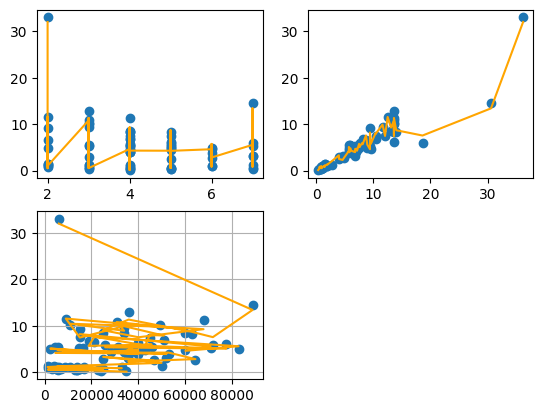

In [42]:
plt.subplot(221)
x_test3 = x_test3.sort_values(by = 'Year')
plt.scatter(x_test3['Year'] , x_test3['y_test'] , label='real')
plt.plot(x_test3['Year'] , x_test3['y_pred'], color='orange' , label='prediction')

plt.subplot(222)
x_test3 = x_test3.sort_values(by = 'Present_Price')
plt.scatter(x_test3['Present_Price'] , x_test3['y_test'], label='real')
plt.plot(x_test3['Present_Price'] , x_test3['y_pred'],color='orange' , label='prediction')

plt.subplot(223)
x_test = x_test.sort_values(by = 'Kms_Driven')
plt.scatter(x_test3['Kms_Driven'] , x_test3['y_test'], label='real')
plt.plot(x_test3['Kms_Driven'] , x_test3['y_pred'],color='orange' , label='prediction')

plt.grid()
plt.show()

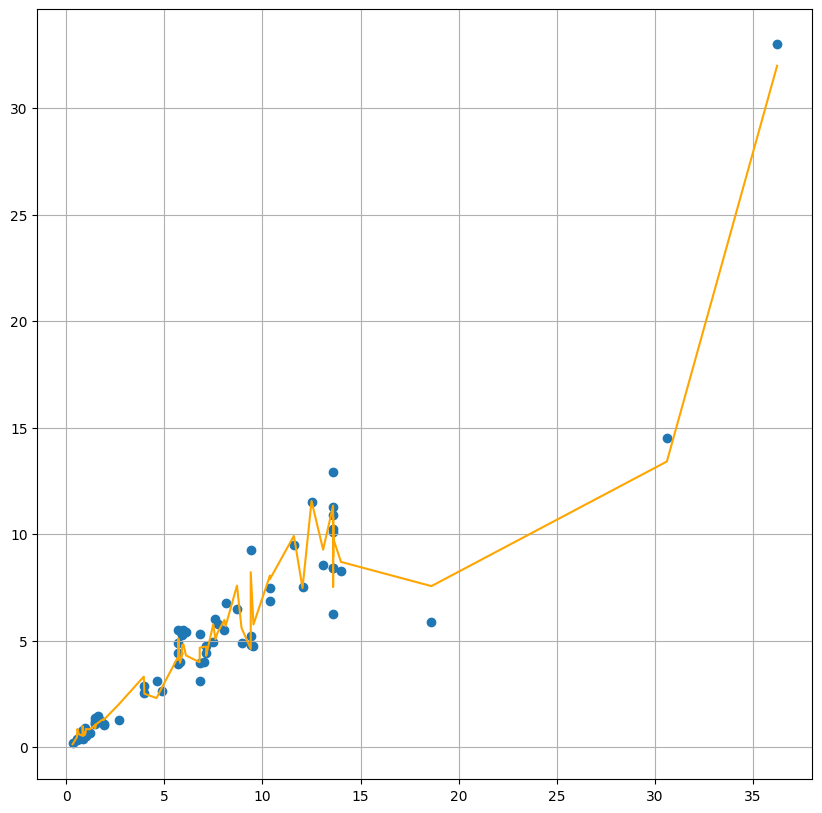

In [43]:
plt.figure(figsize=(10, 10))
x_test3 = x_test3.sort_values(by = 'Present_Price')
plt.scatter(x_test3['Present_Price'] , x_test3['y_test'], label='real')
plt.plot(x_test3['Present_Price'] , x_test3['y_pred'],color='orange' , label='prediction')
plt.grid()
plt.show()

In [44]:
df5.columns

Index(['Year2_Present', 'Year2_Kms2', 'Year2_Kms', 'Year2_Fuel2', 'Year2_Fuel',
       'Year_Present', 'Year_Kms2', 'Year_Kms', 'Year_Fuel2', 'Year_Fuel',
       'Selling_Price', 'Fuel_Type2', 'Kms_Driven2', 'Year2', 'Year',
       'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [77]:
Year = 10
Present_Price = 11.23
Kms_Driven  = 42000
Fuel_Type = 3      #petrol
Seller_Type = 2    #Dealer
Transmission = 2   #manual
Owner = 1
model_input =  pd.DataFrame({'Year2_Present' : [((Year**2)*(Present_Price))],
                            'Year2_Kms2' : [((Year**2)*(Kms_Driven**2))],
                            'Year2_Kms' : [((Year**2)*(Kms_Driven))],
                            'Year2_Fuel2': [((Year**2)*(Fuel_Type**2))],
                            'Year2_Fuel': [((Year**2)*(Fuel_Type))],
                            'Year_Present': [((Year)*(Present_Price))],
                            'Year_Kms2': [((Year)*(Kms_Driven**2))],
                            'Year_Kms': [((Year)*(Kms_Driven))],
                            'Year_Fuel2': [((Year)*(Fuel_Type**2))],
                            'Year_Fuel': [((Year)*(Fuel_Type))],
                            'Selling_Price' :10,
                            'Fuel_Type2': [Fuel_Type**2],
                            'Kms_Driven2': [Kms_Driven**2],
                            'Year2':[Year**2] ,
                            'Year' :[Year] ,
                            'Present_Price':[Present_Price] ,
                            'Kms_Driven':[Kms_Driven] ,
                            'Fuel_Type': [Fuel_Type],
                            'Seller_Type': [Seller_Type],
                            'Transmission': [Transmission],
                            'Owner': [Owner]})

In [78]:
model_input

,Year2_Present,Year2_Kms2,Year2_Kms,Year2_Fuel2,Year2_Fuel,Year_Present,Year_Kms2,Year_Kms,Year_Fuel2,Year_Fuel,Selling_Price,Fuel_Type2,Kms_Driven2,Year2,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1123.0,176400000000,4200000,900,300,112.3,17640000000,420000,90,30,10,9,1764000000,100,10,11.23,42000,3,2,2,1


In [79]:
finall = pd.concat([df5, model_input])
finall

,Year2_Present,Year2_Kms2,Year2_Kms,Year2_Fuel2,Year2_Fuel,Year_Present,Year_Kms2,Year_Kms,Year_Fuel2,Year_Fuel,Selling_Price,Fuel_Type2,Kms_Driven2,Year2,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9.83,4289041,2071,4,2,9.83,4289041,2071,4,2,9.25,4,4289041,1,1,9.83,2071,2,2,2,0
1,74.56,302760000,34800,36,12,37.28,151380000,17400,18,6,17.00,9,75690000,4,2,18.64,8700,3,2,2,0
2,7.12,64000000,16000,36,12,3.56,32000000,8000,18,6,1.65,9,16000000,4,2,1.78,4000,3,3,2,0
3,25.96,1049760000,64800,36,12,12.98,524880000,32400,18,6,6.00,9,262440000,4,2,6.49,16200,3,3,2,0
4,144.92,144000000,24000,16,8,72.46,72000000,12000,8,4,33.00,4,36000000,4,2,36.23,6000,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,460.60,63857290000,1768900,441,147,65.80,9122470000,252700,63,21,4.50,9,1303210000,49,7,9.40,36100,3,2,2,0
238,85.75,6480250000,563500,441,147,12.25,925750000,80500,63,21,0.95,9,132250000,49,7,1.75,11500,3,3,2,0
239,460.60,63504000000,1764000,441,147,65.80,9072000000,252000,63,21,4.50,9,1296000000,49,7,9.40,36000,3,2,2,0
240,262.15,141169275625,2630075,441,147,37.45,20167039375,375725,63,21,3.00,9,2881005625,49,7,5.35,53675,3,2,2,0


In [80]:
x_final = finall.drop(['Selling_Price'] , axis=1)[:241]
y_final = finall['Selling_Price'][:241]
x_predict = finall.drop(['Selling_Price'] , axis=1)[241:] 

In [81]:
model3.fit(x_final,y_final)

LinearRegression()

In [82]:
y_predict = model3.predict(x_predict)
y_predict

array([1.65076607])

In [51]:
finall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 0
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year2_Present  242 non-null    float64
 1   Year2_Kms2     242 non-null    int64  
 2   Year2_Kms      242 non-null    int64  
 3   Year2_Fuel2    242 non-null    int64  
 4   Year2_Fuel     242 non-null    int64  
 5   Year_Present   242 non-null    float64
 6   Year_Kms2      242 non-null    int64  
 7   Year_Kms       242 non-null    int64  
 8   Year_Fuel2     242 non-null    int64  
 9   Year_Fuel      242 non-null    int64  
 10  Selling_Price  242 non-null    float64
 11  Fuel_Type2     242 non-null    int64  
 12  Kms_Driven2    242 non-null    int64  
 13  Year2          242 non-null    int64  
 14  Year           242 non-null    int64  
 15  Present_Price  242 non-null    float64
 16  Kms_Driven     242 non-null    int64  
 17  Fuel_Type      242 non-null    int64  
 18  Seller_Type    24

In [52]:
finall.describe()

,Year2_Present,Year2_Kms2,Year2_Kms,Year2_Fuel2,Year2_Fuel,Year_Present,Year_Kms2,Year_Kms,Year_Fuel2,Year_Fuel,Selling_Price,Fuel_Type2,Kms_Driven2,Year2,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,242.000000,2.420000e+02,2.420000e+02,242.000000,242.000000,242.000000,2.420000e+02,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,155.354988,3.687936e+10,7.444355e+05,159.049587,56.239669,31.888831,6.658930e+09,141548.648760,33.198347,11.710744,5.144380,7.913223,1.285490e+09,20.380165,4.231405,7.436322,29387.752066,2.780992,2.338843,2.128099,0.028926
std,221.546329,7.242594e+10,8.779610e+05,126.458945,41.802346,35.653750,1.132511e+10,130050.861062,15.439143,4.690306,5.081592,2.149185,1.850171e+09,14.611572,1.576594,7.225058,20581.558127,0.424325,0.474297,0.334893,0.167945
min,2.040000,2.250000e+06,2.071000e+03,4.000000,2.000000,1.020000,7.500000e+05,1500.000000,4.000000,2.000000,0.180000,4.000000,2.500000e+05,1.000000,1.000000,0.320000,500.000000,2.000000,2.000000,2.000000,0.000000
25%,23.250000,1.654719e+09,1.351328e+05,81.000000,27.000000,5.677500,6.074100e+08,40671.000000,20.000000,9.000000,1.062500,9.000000,1.960000e+08,9.000000,3.000000,1.470000,14000.000000,3.000000,2.000000,2.000000,0.000000
50%,91.200000,1.081600e+10,4.480290e+05,144.000000,48.000000,24.700000,2.721000e+09,104000.000000,28.000000,12.000000,4.500000,9.000000,6.726284e+08,16.000000,4.000000,6.625000,25935.000000,3.000000,2.000000,2.000000,0.000000
75%,187.955000,3.980100e+10,1.043750e+06,225.000000,75.000000,40.800000,8.037860e+09,199500.000000,45.000000,15.000000,6.825000,9.000000,1.757264e+09,25.000000,5.000000,9.505000,41919.500000,3.000000,3.000000,2.000000,0.000000
max,1499.890000,6.561000e+11,5.130643e+06,900.000000,300.000000,214.270000,1.093500e+11,810000.000000,90.000000,30.000000,33.000000,16.000000,1.822500e+10,100.000000,10.000000,36.230000,135000.000000,4.000000,3.000000,3.000000,1.000000


In [53]:
print(model3.intercept_)
print(model2.coef_)

-0.7944633710694804
[[ 1.52871795e-01  5.94030701e-01 -3.61738528e-10  1.73564779e-02
  -5.75604738e-01  6.19206464e-01 -5.08260586e-07 -4.39142656e+00
  -5.29366699e-01  6.49810815e-01  1.52871795e-01]]


In [76]:
finall

,Year2_Present,Year2_Kms2,Year2_Kms,Year2_Fuel2,Year2_Fuel,Year_Present,Year_Kms2,Year_Kms,Year_Fuel2,Year_Fuel,Selling_Price,Fuel_Type2,Kms_Driven2,Year2,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9.83,4289041,2071,4,2,9.83,4289041,2071,4,2,9.25,4,4289041,1,1,9.83,2071,2,2,2,0
1,74.56,302760000,34800,36,12,37.28,151380000,17400,18,6,17.00,9,75690000,4,2,18.64,8700,3,2,2,0
2,7.12,64000000,16000,36,12,3.56,32000000,8000,18,6,1.65,9,16000000,4,2,1.78,4000,3,3,2,0
3,25.96,1049760000,64800,36,12,12.98,524880000,32400,18,6,6.00,9,262440000,4,2,6.49,16200,3,3,2,0
4,144.92,144000000,24000,16,8,72.46,72000000,12000,8,4,33.00,4,36000000,4,2,36.23,6000,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,460.60,51190872516,1583778,196,98,65.80,7312981788,226254,28,14,5.35,4,1044711684,49,7,9.40,32322,2,2,2,0
237,460.60,63857290000,1768900,441,147,65.80,9122470000,252700,63,21,4.50,9,1303210000,49,7,9.40,36100,3,2,2,0
238,85.75,6480250000,563500,441,147,12.25,925750000,80500,63,21,0.95,9,132250000,49,7,1.75,11500,3,3,2,0
240,262.15,141169275625,2630075,441,147,37.45,20167039375,375725,63,21,3.00,9,2881005625,49,7,5.35,53675,3,2,2,0
